In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/college-student-ai-use-in-school/AI On-Campus Research Survey (Responses).xlsx


# About the Dataset
The dataset appears to be a collection of responses from a survey where participants were asked various questions about their knowledge, usage, and interest in Artificial Intelligence (AI), as well as whether they know what Chat-GPT is and what college department they belong to. Here's a breakdown of what the dataset columns represent:

1. **Timestamp**: The exact date and time when the survey response was submitted.
2. **Knowledge and understanding of AI**: Respondents rated their knowledge and understanding of AI on a scale from 1 to 5, with 5 being the highest.
3. **Usage of AI for personal use**: This column indicates how often the respondents use AI for personal tasks, rated from 1 to 5.
4. **Usage of AI for school-related tasks**: How often the respondents use AI for their school-related tasks, again rated from 1 to 5.
5. **Interest in pursuing a career in AI**: It shows the level of interest the respondents have in pursuing a career in AI, rated from 1 to 5.
6. **Knowledge of what Chat-GPT is**: This is a yes or no response, indicating whether the respondent knows what Chat-GPT is.
7. **College Department**: The department of the college the respondents are in, with options like Science, Engineering & Technology; Business; Humanities & Social Sciences.


In [3]:
#Load the dataset
df = pd.read_excel('/kaggle/input/college-student-ai-use-in-school/AI On-Campus Research Survey (Responses).xlsx')

In [4]:
df.head()

,Timestamp,"On a scale from 1 to 5, how would you rate your knowledge and understanding of Artificial Intelligence (AI)?","On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for personal use?","On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for school-related tasks?","On a scale from 1 to 5, how interested are you in pursuing a career in Artificial Intelligence?",Do you know what Chat-GPT is?,What college are you in?
0,2023-03-31 19:59:11.443,5,5,5,5,Yes,"Science, Engineering, & Technology"
1,2023-03-31 19:59:44.970,4,3,4,4,Yes,"Science, Engineering, & Technology"
2,2023-03-31 20:06:24.653,3,3,5,1,No,Business
3,2023-03-31 20:10:54.939,4,3,5,2,Yes,Business
4,2023-03-31 20:14:34.488,5,2,1,5,Yes,Humanities & Social Sciences


In [21]:
print(df.columns)


Index(['Timestamp',
       'On a scale from 1 to 5, how would you rate your knowledge and understanding of Artificial Intelligence (AI)?',
       'On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for personal use?',
       'On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for school-related tasks?',
       'On a scale from 1 to 5, how interested are you in pursuing a career in Artificial Intelligence?',
       'Do you know what Chat-GPT is?', 'What college are you in?'],
      dtype='object')


In [56]:
#check the size of the data
df.size

1806

In [57]:
#check the shape of the data
df.shape

(258, 7)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 7 columns):
 #   Column                                                                                                        Non-Null Count  Dtype         
---  ------                                                                                                        --------------  -----         
 0   Timestamp                                                                                                     258 non-null    datetime64[ns]
 1   On a scale from 1 to 5, how would you rate your knowledge and understanding of Artificial Intelligence (AI)?  258 non-null    int64         
 2   On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for personal use?                   258 non-null    int64         
 3   On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for school-related tasks?           258 non-null    int64         
 4   On a scale from

In [59]:
df.describe()

,Timestamp,"On a scale from 1 to 5, how would you rate your knowledge and understanding of Artificial Intelligence (AI)?","On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for personal use?","On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for school-related tasks?","On a scale from 1 to 5, how interested are you in pursuing a career in Artificial Intelligence?"
count,258,258.000000,258.000000,258.000000,258.000000
mean,2023-04-21 18:28:58.153763584,3.294574,2.244186,2.104651,1.794574
min,2023-03-31 19:59:11.443000,1.000000,1.000000,1.000000,1.000000
25%,2023-04-06 08:26:21.530749952,3.000000,1.000000,1.000000,1.000000
50%,2023-04-11 12:48:24.440999936,3.000000,2.000000,2.000000,1.000000
75%,2023-04-19 14:33:23.658249984,4.000000,3.000000,3.000000,2.000000
max,2024-01-25 14:51:10.920000,5.000000,5.000000,5.000000,5.000000
std,NaN,0.973606,1.020445,1.216256,1.177137


In [22]:
df['On a scale from 1 to 5, how would you rate your knowledge and understanding of Artificial Intelligence (AI)?'].value_counts()


On a scale from 1 to 5, how would you rate your knowledge and understanding of Artificial Intelligence (AI)?
3    97
4    84
2    42
5    26
1     9
Name: count, dtype: int64

In [39]:
df['On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for personal use?'].value_counts()


On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for personal use?
2    90
1    70
3    68
4    25
5     5
Name: count, dtype: int64


In [25]:
df['On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for school-related tasks?'].value_counts()


On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for school-related tasks?
1    111
2     64
3     40
4     31
5     12
Name: count, dtype: int64

In [26]:
df['On a scale from 1 to 5, how interested are you in pursuing a career in Artificial Intelligence?'].value_counts()


On a scale from 1 to 5, how interested are you in pursuing a career in Artificial Intelligence?
1    150
2     55
3     25
5     16
4     12
Name: count, dtype: int64

In [30]:
df[['Do you know what Chat-GPT is?', 'What college are you in?']].value_counts()


Do you know what Chat-GPT is?  What college are you in?          
Yes                            Science, Engineering, & Technology    94
                               Business                              55
                               Humanities & Social Sciences          32
                               Arts & Media                          11
No                             Business                              10
Yes                            Nursing & Health Care                 10
No                             Science, Engineering, & Technology     9
Yes                            Education                              9
No                             Humanities & Social Sciences           7
Yes                            Theology                               7
No                             Nursing & Health Care                  6
                               Education                              4
                               Arts & Media                           

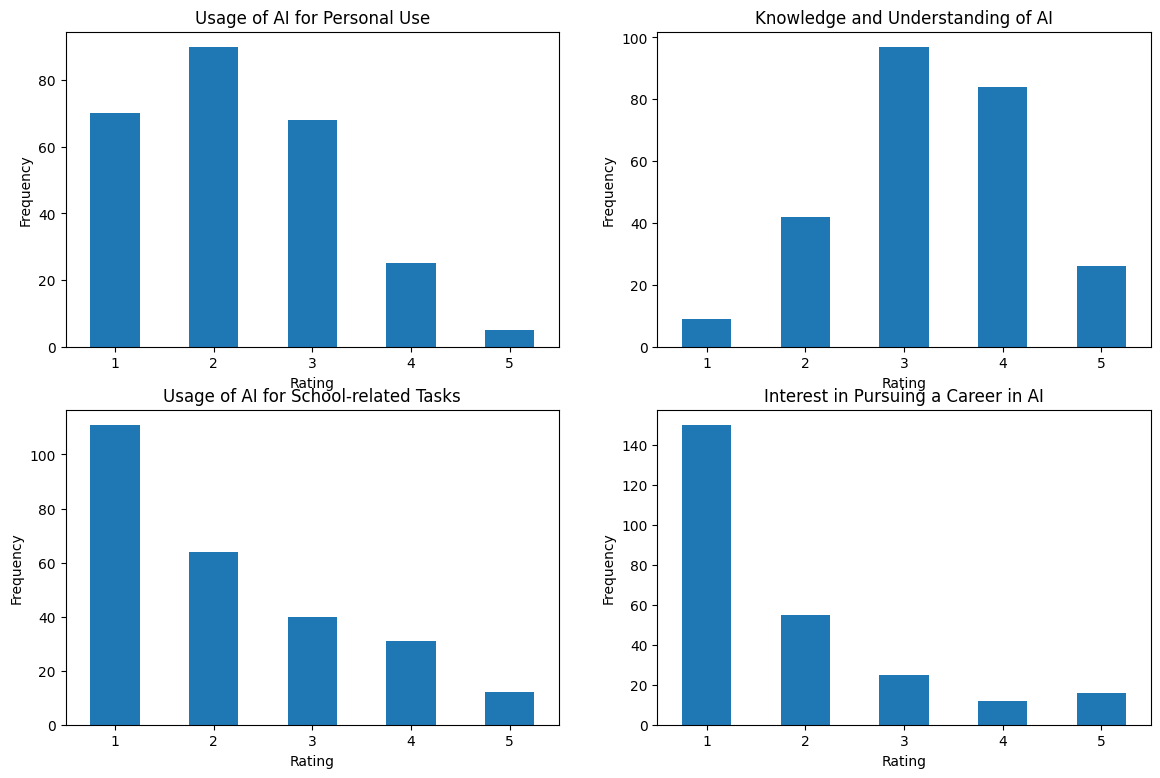

In [55]:
import matplotlib.pyplot as plt

# Define the data
data1 = df['On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for personal use?'].value_counts().sort_index()
data2 = df['On a scale from 1 to 5, how would you rate your knowledge and understanding of Artificial Intelligence (AI)?'].value_counts().sort_index()
data3 = df['On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for school-related tasks?'].value_counts().sort_index()
data4 = df['On a scale from 1 to 5, how interested are you in pursuing a career in Artificial Intelligence?'].value_counts().sort_index()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 9))

# Plot data on each subplot
data1.plot(kind='bar', ax=axes[0, 0])
data2.plot(kind='bar', ax=axes[0, 1])
data3.plot(kind='bar', ax=axes[1, 0])
data4.plot(kind='bar', ax=axes[1, 1])

# Set titles and labels
axes[0, 0].set_title('Usage of AI for Personal Use')
axes[0, 1].set_title('Knowledge and Understanding of AI')
axes[1, 0].set_title('Usage of AI for School-related Tasks')
axes[1, 1].set_title('Interest in Pursuing a Career in AI')
for ax in axes.flat:
    ax.set_xlabel('Rating')
    ax.set_ylabel('Frequency')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Show the plot
plt.show()


# Average self-rated knowledge of AI


In [21]:
# Average self-rated knowledge of AI
average_knowledge = df['On a scale from 1 to 5, how would you rate your knowledge and understanding of Artificial Intelligence (AI)?'].mean()
print("Average Knowledge of AI:", average_knowledge)

# Frequency of AI usage for personal use
average_personal_usage = df['On a scale from 1 to 5, how often do you use Artificial Intelligence (AI) for personal use?'].mean()
print("Average Personal Usage of AI:", average_personal_usage)

# Most common level of interest in pursuing a career in AI
common_interest = df['On a scale from 1 to 5, how interested are you in pursuing a career in Artificial Intelligence?'].mode()[0]
print("Most Common Interest in AI Career:", common_interest)


Average Knowledge of AI: 3.294573643410853
Average Personal Usage of AI: 2.244186046511628
Most Common Interest in AI Career: 1


# Average self-rated knowledge level of AI among college students:


In [28]:
average_knowledge = df['On a scale from 1 to 5, how would you rate your knowledge and understanding of Artificial Intelligence (AI)?'].mean()
print("Average Knowledge of AI:", average_knowledge)


Average Knowledge of AI: 3.294573643410853


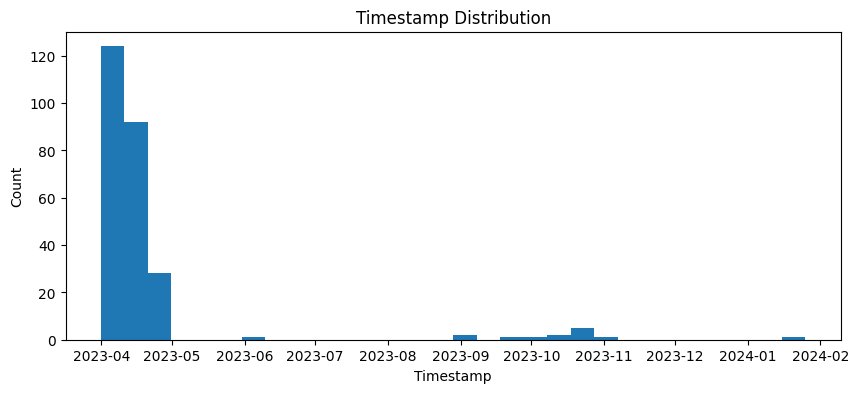

In [72]:
plt.figure(figsize=(10, 4))
plt.hist(df['Timestamp'], bins=30)
plt.title('Timestamp Distribution')
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.show()

The histogram shows a significant decrease after April 2023. The highest bar corresponds to April 2023, indicating the highest count of timestamps in this month, with the count being over 120. There is a sharp decline into May 2023 with the count dropping to under 40. From June 2023 onwards, the count of timestamps is relatively low, mostly under 10, with slight variations between months. There is a particularly low activity from October 2023 to February 2024, with counts close to zero.






